In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean data

In [3]:
df = pd.read_csv('data/Online_Retail.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# values nulls by column names
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# duplicate values
df.duplicated().sum()

np.int64(5268)

In [8]:
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f'{col} has {len(values)} unique values')
    print(f'values {values[:10]}')
    print('-' * 50)

InvoiceNo has 25900 unique values
values ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
StockCode has 4070 unique values
values ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Description has 4224 unique values
values ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Quantity has 722 unique values
values [ 6  8  2 32  3  4 24 12 48 18]
--------------------------------------------------
InvoiceDate has 23260 unique values
values ['12/1/10 8:26' '12/1/10 8:28' '12/1/10 8:34' '12/1/10 8:35

In [9]:
cleaned_df = df.drop_duplicates()
cleaned_df = cleaned_df.dropna(subset=['CustomerID'])

In [10]:
cleaned_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
cleaned_df.duplicated().sum()

np.int64(0)

# Trasfom data

In [12]:
cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [27]:
cleaned_df['TotalAmount'] = cleaned_df['Quantity'] * cleaned_df['UnitPrice']
cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'], format='%m/%d/%Y %H:%M')
cleaned_df['Year'] = cleaned_df['InvoiceDate'].dt.year
cleaned_df['Month'] = cleaned_df['InvoiceDate'].dt.month

In [28]:
cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Mounth,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010,12


In [30]:
sales_by_year = cleaned_df.groupby('Year')['TotalAmount'].sum()
sales_by_year

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

In [31]:
cleaned_df['Semester'] = cleaned_df['Month'].apply(lambda x: 1 if x <= 6 else 2)

In [32]:
sales_by_semester = cleaned_df.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

In [33]:
cleaned_df['Quarter'] = cleaned_df['Month'].apply(lambda x: 1 if x<=3 else (2 if x<=6 else (3 if x<=9 else 4)))

In [34]:
sales_by_quarter = cleaned_df.groupby(['Year', 'Quarter'])['TotalAmount'].sum()
sales_by_quarter

Year  Quarter
2010  4           552372.860
2011  1          1487842.180
      2          1679096.861
      3          2117546.643
      4          2441660.880
Name: TotalAmount, dtype: float64

In [35]:
sales_by_month = cleaned_df.groupby(['Year','Month'])['TotalAmount'].sum()
sales_by_month

Year  Month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalAmount, dtype: float64

# Graficación y análisis de resultados

In [37]:
total_returns = cleaned_df[cleaned_df['TotalAmount'] < 0].shape[0]
total_returns

8872

In [40]:
total_no_returns = cleaned_df[cleaned_df['TotalAmount'] >= 0].shape[0]
total_no_returns

392732

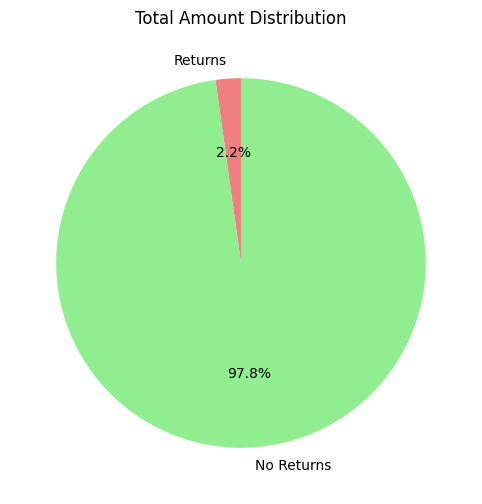

In [45]:
labels = ['Returns', 'No Returns']
sizes = [total_returns, total_no_returns]
color = ['lightcoral', 'lightgreen']
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Total Amount Distribution')
plt.show()

In [46]:
# create a category colum based on the value of the transaction (i.e: Low, Medium, High)
def categorize_transaction(value):
    if value < 20:
        return 'Low'
    elif value < 100:
        return 'Medium'
    else:
        return 'High'
cleaned_df['TransactionCategory'] = cleaned_df['TotalAmount'].apply(categorize_transaction)
cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Mounth,Month,Semester,Quarter,TransactionCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,2010,12,2,4,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010,12,2,4,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,2010,12,2,4,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010,12,2,4,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010,12,2,4,Medium


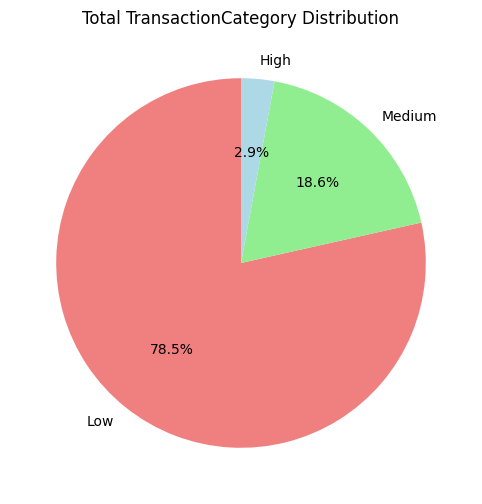

In [49]:
labels = list(cleaned_df['TransactionCategory'].value_counts().index)
sizes = list(cleaned_df['TransactionCategory'].value_counts().values)
color = ['lightcoral', 'lightgreen', 'lightblue']
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Total TransactionCategory Distribution')
plt.show()

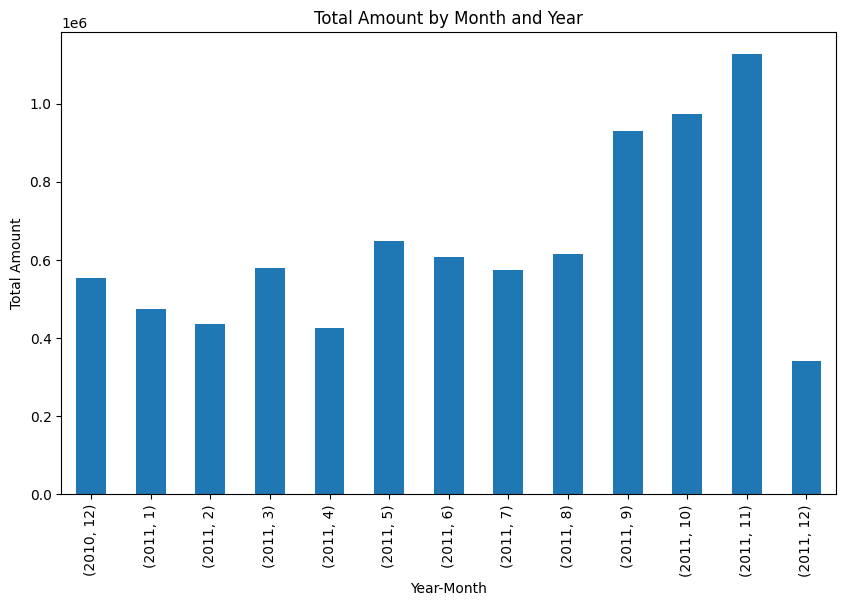

In [50]:
plt.figure(figsize=(10, 6))
cleaned_df.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Total Amount by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')
plt.show()

In [56]:
top_products = cleaned_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products.head()

,StockCode,Quantity
0,84077,53119
1,22197,48689
2,85099B,44963
3,84879,35215
4,85123A,34185


In [57]:
top_products = pd.merge(top_products, cleaned_df[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')
top_products.head()

,StockCode,Quantity,Description
0,84077,53119,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,22197,48689,SMALL POPCORN HOLDER
2,22197,48689,POPCORN HOLDER
3,85099B,44963,JUMBO BAG RED RETROSPOT
4,84879,35215,ASSORTED COLOUR BIRD ORNAMENT


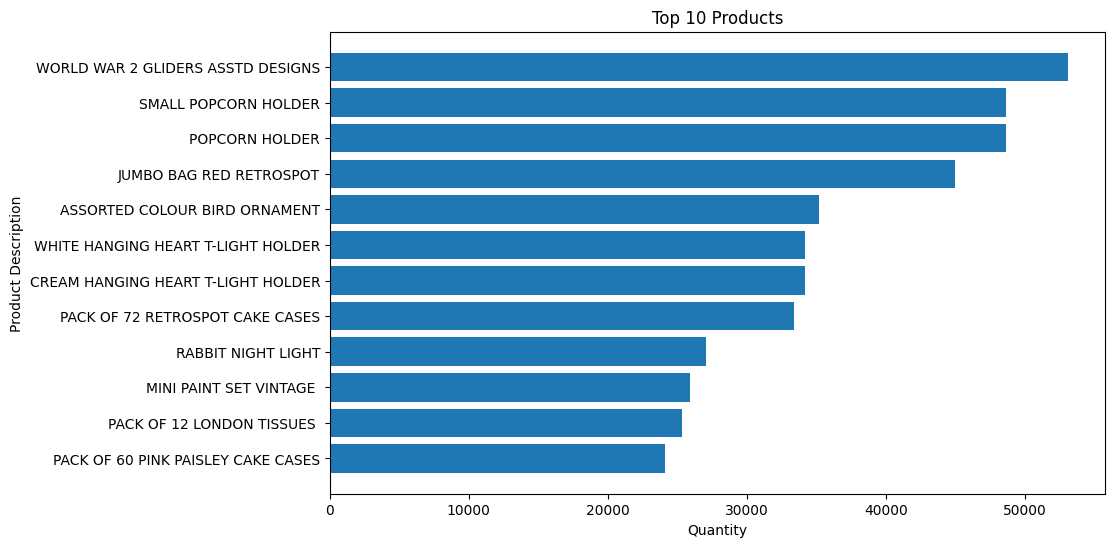

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top 10 Products')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.gca().invert_yaxis() # invert the y axis to have the product with the highest quantity on top
plt.show()